# Project Group - 2

Memebers & Student numbers:  
 
Wessel Toutenhoofd - 4967402  
Mats Jager - 5387906  
Abel Arts - 5516064  
Pieter Ceulen - 5569184  
Maria Priimagi - 5292948  
Francisco Rei - 6530109   

# 1. Introduction
Crowd management is an important aspect to ensure safety, efficiency, and a pleasant experience for visitors during large public events. It is an essential element to monitor in order to keep everything running smoothly and to prevent dangerous overcrowding.  

With the use of artificial intelligence and machine learning models, it has become possible to predict crowd movement and density over short periods of time. These technologies allow event organisers to anticipate changes in crowd behaviour and respond proactively to potential risks.
There are several factors that can influence crowd movement and intensity during an event. These depend mainly on the type of event, its layout, location, and schedule. External factors such as weather conditions can also have a significant impact on crowd dynamics. Therefore, it is important to monitor these variables closely and understand how they affect the safety and flow of visitors.  

The SAIL event in Amsterdam is the largest nautical event in the world, attracting millions of visitors over several days. With thousands of ships and activities taking place both on land and on the water, ensuring safe and efficient crowd movement is a critical challenge in such a large-scale urban environment. Accurate and timely crowd predictions are therefore essential to guarantee the safety of visitors and to support effective crowd management.  

This study looks at the SAIL 2025 event in Amsterdam and uses its data, with the aim of developing a short-term crowd prediction model (15 minutes ahead) to forecast crowd density and movement patterns in the IJhaven and surrounding event areas. In particular, the study focuses on providing actionable insights for proactive crowd management, early-warning of congestion, and improving overall safety and visitor experience during this large-scale urban nautical event.  
 

 


# 2. Research Objective and SMART Criteria

## 2.1 Research Objective

Main ojective of this study is to design and evaluate a predictive model capable of forecasting crowd densities and movement patterns 15 minutes ahead, by integrating real-time crowd sensor data, weather information from KNMI, vehicular traffic flow data, and vessel location data. By specifically focusing at the SAIL 2025 event that took place and using its data, the following research question has been formed:   

### "To what extent can real-time and contextual data be used to accurately predict short-term (15 minute) crowd behaviour patterns during SAIL 2025?"

Answering this research question can provide useful insights and information for event organisers and safety authorities, which can help contribute to the development of effective prediction models for the next SAIL event and other similar large-scale public events.


## 2.2 SMART Criteria

Specific: The study focuses on the SAIL 2025 event, making use of collected real-time and contextual data to model and predict crowd behaviour, focusing on one specific location (Amsterdam) and one time period (20-24 of August 2025).  

Measurable: Predictions will be compared against real-world observations to accurately assess model performance.  

Achievable: SAIL is a well-documented, large-scale event with rich data availability, making it an ideal case study for developing and validating short-term crowd prediction models.  

Relevant: SAIL is one of the largest global events. Accurate short-term predictions contribute directly to operational decision-making and risk prevention.  

Time-Bound: The study is limited to short-term prediction (15 minutes).  


# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**:

**Author 2**: Abel Arts - Focus on data preparation, Ridge model predictions & visualisations

**Author 3**: Francisco Rei - Research and Design of Monitoring Dashboard using Streamlit

**Author 4**: Maria Priimägi - Introduction, Data Pipeline, conclusion, limitations and further research

# 3. Data Used

All data sets used in this project can be found in the `data_pipeline/` folder.  

The data sets used have been shared via the TIL6022 course professors and collected from various sources during the SAIL 2025 event (August 20-24, 2025).  

---

## Data Source 1 - Crowd Sensor Data
**File:** `sensordata_SAIL2025.csv`  

**Description:**  
Real-time crowd flow measurements from multiple sensors placed throughout the Amsterdam event area during SAIL 2025. The sensors measure pedestrian flow in different directions, providing bidirectional crowd movement data.

**Content:**
- **Timestamp:** Date and time of measurement (3-minute intervals)
- **Sensor measurements:** Multiple columns representing different sensors with their measurement angles (e.g., `CMSA-GAKH-01_0`, `CMSA-GAKH-01_180`)
- **Format:** Each sensor has two directional measurements (typically 180Â° apart)
- **Coverage:** August 20-24, 2025
- **Sensors include:** CMSA, GACM, GASA, and GVCV series sensors
- **Measurement unit:** People per meter per minute (normalized by effective width of measurement location)

**Usage in project:**  
This is the primary target variable for our prediction models. The sensor data is used to train and validate both Ridge regression and XGBoost models for short-term crowd behavior forecasting.

---

## Data Source 2 - Weather Data (KNMI)
**File:** `SAIL_Amsterdam_10min_Weather_2025-08-20_to_2025-08-24_FIXED.csv`  

**Description:**  
Weather observations from the Royal Netherlands Meteorological Institute (KNMI) for Amsterdam during the SAIL 2025 event. Weather conditions significantly influence crowd movement patterns and visitor behavior during outdoor events.

**Content:**
- **DateTime:** Timestamp of weather observation (10-minute intervals, resampled to 3-minute)
- **Temperature_°C:** Air temperature in degrees Celsius
- **Humidity_%:** Relative humidity percentage
- **Rain_mm:** Precipitation amount in millimeters
- **Coverage:** August 20-24, 2025
- **Source:** KNMI weather station data for Amsterdam area

**Usage in project:**  
Weather variables are used as features in the machine learning models to account for environmental factors affecting crowd behavior. Temperature, humidity, and rainfall patterns help explain variations in crowd density and movement.

---

## Data Source 3 - Vessel Position Data
**Files:** `vessels_data.parquet`  

**Description:**  
Real-time position tracking data for vessels participating in SAIL Amsterdam 2025. As a nautical event, the presence and movement of large vessels significantly impacts crowd distribution as spectators gather to view the ships.

**Content:**
- **timestamp/upload-timestamp:** Time of vessel position update
- **imo-number:** International Maritime Organization ship identification number
- **lat:** Latitude coordinate of vessel
- **lon:** Longitude coordinate of vessel
- **length:** Vessel length in meters
- **Coverage:** August 20-24, 2025
- **Focus:** Vessels larger than 100 meters (length > 10,000 cm in the dataset)

**Usage in project:**  
Vessel proximity to sensors is calculated using the Haversine formula. Weighted distance features are created for each sensor, where closer and larger vessels have more influence. These features help predict crowd surges near waterfront locations when impressive vessels are nearby.

---

## Data Source 4 - Sensor Location Data
**File:** `sensor-location.xlsx - Sheet1.csv`  

**Description:**  
Geographic coordinates and metadata for all crowd sensors deployed during SAIL 2025. This reference data enables spatial analysis and visualization of crowd patterns.

**Content:**
- **Objectnummer:** Unique sensor identifier (e.g., CMSA-GAKH-01, GASA-01-A1)
- **Lat/Long:** Geographic coordinates (latitude, longitude)
- **Effectieve breedte:** Effective measurement width in meters
- **Location names:** Descriptive names of sensor placement locations

**Usage in project:**  
Essential for:
1. Calculating distances between sensors and vessels
2. Creating vector maps showing crowd flow directions
3. Normalizing crowd counts by effective sensor width
4. Visualizing spatial patterns on Amsterdam city maps


---

**Data Pipeline Overview:**  
All raw data sources are preprocessed, synchronized to 3-minute intervals, and merged into a unified dataset for model training. The pipeline includes:
1. Timestamp standardization (UTC conversion)
2. Data resampling (10-min weather → 3-min intervals)
3. Spatial feature engineering (vessel-sensor distances)
4. Sensor value normalization by effective width
5. Feature aggregation and cleaning


# 4. Data Pipeline

### **Datafile 1: Data Organisation and Preparation**

The datasets used for the model, as described in the previous paragraph, were raw datasets collected from several different sources. Each dataset originally followed a different structure and time format. Therefore, to make it usable for the model, the first part of the pipeline focuses on organising, cleansing, and aligning the data.  

**1. Data Loading**  
All CSV and Parquet files are imported and reviewed. Unnecessary or redundant variables are removed, keeping only the essential columns such as *timestamp*, *sensor ID*, *latitude*, *longitude*, *vessel length*, *temperature*, and *precipitation*.  

**2. Timestamp Conversion and Synchronisation**  
Each dataset uses its own time notation, which is converted to a unified `datetime` format. Missing or irregular timestamps are adjusted using interpolation or forward-filling to ensure that all data sources are aligned on the same time intervals.  

**3. Data Cleaning**  
For cleaning the data, irrelevant rows, empty cells, and invalid coordinates are filtered out to improve data quality. The data types are also standardised across all files in order to enhance efficiency and minimise memory usage.  

**4. Merging and Alignment**  
After preprocessing, the datasets are merged based on the timestamp variable. Sensor IDs are linked to their corresponding metadata using the *Objectnummer* field to ensure spatial accuracy. The resulting table connects each sensor reading to its contextual information, such as weather and vessel activity.  

**5. Output Format**  
Finally, the cleaned and aligned data is stored as a single structured table in Parquet format. This table contains all required variables per timestamp and functions as the main input for the predictive modelling notebooks.  

**Outcome**  
The result of *Datafile 1* and this step is an integrated dataset that contains both real-time and contextual features for every sensor location. This dataset can now be used for short-term (15-minute) crowd flow forecasting during SAIL 2025.  


### **Datafile 2: Forecasting using Ridge Regression**
The first model used for prediction within the pipeline is the Ridge Regression model. The model serves as a baseline method to estimate short-term crowd density changes based on the prepared dataset. 


**1. Data Selection and Splitting**  
The dataset is divided into a training set and a test set based on time (temporal split).  
Eighty percent of the earlier data is used for training, while the remaining twenty percent is reserved for validation and testing. This ensures that the model is evaluated on unseen data from a later period. This corresponds to training on the first four days and testing on the fifth. 

**2. Feature Scaling and Model Training**  
The numerical features are scaled using standardisation to normalise their ranges, preventing any single variable from dominating the model outcome.  
The Ridge Regression model applies regularisation, which constrains extreme coefficient values and reduces overfitting. Once trained, the model outputs predicted crowd intensities for each sensor, forecasting fifteen minutes ahead.  

**3. Prediction and Evaluation**  
The performance of the Ridge model is assessed using the Root Mean Square Error (RMSE), which quantifies the difference between the predicted and actual sensor values.  
This baseline forecast provides insight into how effectively linear relationships can capture short-term crowd behaviour patterns.  


### **Datafile 3: Forecasting using XGBoost**


The second forecasting method is the XGBoost model. This is a gradient boosting approach implemented to capture more complex, non-linear relationships within the same dataset.  
The gradient boosting technique allows the model to identify subtle patterns between vessel movement, weather, and crowd density that a linear model might overlook.  

**1. Model Input**  
For the XGBoost model, the same dataset is used as input as for the Ridge model.  
Important input variables include vessel density near sensors, time of day, weather conditions, and previous crowd counts.  

**2. Model Training**  
The model is trained to predict crowd intensity fifteen minutes ahead.  
Hyperparameters such as tree depth, learning rate, and regularisation terms are optimised using grid search on a smaller data subset to improve accuracy while maintaining computational efficiency.  

**3. Prediction Output**  
The predicted results are stored as a timestamped dataset named `predicted_sensor_values_3min_xgb.csv`.  
These results form the main predictive layer of the system and are later used in the visualisation process.  

**4. Evaluation**  
The predicted results are compared to the observed sensor data to evaluate model accuracy and responsiveness to real-time fluctuations.  
Compared to Ridge Regression, XGBoost achieves greater stability and accuracy, providing a more reliable representation of short-term crowd dynamics.  

### **Datafile 4: Dashboard Integration and Visualisation**

The final step of the pipeline integrates the processed data and model outputs into a Streamlit-based dashboard, where the predicted data is visualised.  

**1. Data Sources for the Dashboard**  
The dashboard combines the predicted sensor values with the sensor location data to visualise the spatial and temporal patterns of crowd movement across Amsterdam.  
`sensor-location.xlsx` provides the coordinates of each sensor, while `predicted_sensor_values_3min.csv` contains the model predictions used for visualisation.  

**2. Visualisation**  
Each sensor is represented by a coloured vector that indicates the predicted direction and strength of the crowd flow.  
The map includes interactive features such as zooming and a play/pause frame player, allowing the user to explore crowd movements across different timestamps.  
The interface provides a real-time overview of local crowd densities and directions, enabling event operators to monitor and anticipate potential congestion areas.  

**3. Purpose**  
This visualisation allows decision-makers to identify crowd surges and potential bottlenecks in real time, supporting safer and more efficient crowd management during SAIL 2025.  

# 5. Sub-Research Questions

In order to answer the main research question and gain deeper insights into the topic, the following sub-research questions have been formulated:


- 1. How can crowd surges be predicted in real time?  


- 2. What methods can be used to quantify uncertainty in short-term predictions?  


- 3. Which input features (public transport arrivals, time-of-day, weather, event schedule) contribute most to prediction accuracy?  


- 4. How can these predictions be effectively visualised for use in crowd management dashboards?   


- 5. How can AI be used to monitor crowd movements, predict bottlenecks and risks, and provide decision support?  


# 6. Graphical Visualizations

### 6.1 Model Evaluation Visualisations 
Based on the Ridge Regression model and the XGBoost model, several graphs were created to evaluate the performance of both models and also to compare the working of them. These include predicted versus actual value plots, average sensor errors, and feature importance visualisations.  

When comparing the two models, the results show that the XGBoost model outperforms Ridge Regression with lower RMSE values (typically 0.5–0.8) and more stable predictions over time.  

These graphs are further discussed in Sections 6.1.1 and 6.1.2.

#### 6.1.1 Ridge Regression Visualisation 
The Ridge Regression model was evaluated using several visualisations to assess its predictive accuracy and behaviour across different sensors.  
The following figures show how well the model reproduces observed crowd flows, which features were most influential, and how the data was structured for training and prediction.


![Predicted vs Actual Values](Graphs/ridgepredictedvsactualvalues.png)

This graph compares the predicted and actual crowd flow values for all sensors. The closer the points lie to the diagonal line, the better the model performs. This Ridge Regression model follows the overall trend of the measured data but shows larger deviations during sudden peaks, which indicates that it captures general behaviour but not extreme fluctuations.


![Average Error per Sensor](Graphs/ridgeaveragerror.png) 

This figure illustrates the average prediction error per sensor. It shows that sensors located in busy or open areas tend to have higher average errors, while sensors in more stable areas show smaller deviations. These results indicate that the Ridge model performs consistently across most locations but has limited ability to adapt to rapid changes in crowd density.

![Most Important Features](Graphs/ridgemostimportantfeatures.png) 

Here, the figure presents the three most important features that were identified by the Ridge Regression model. Contextual variables such as time of day, vessel activity, and weather conditions show to have the highest influence on prediction accuracy. This highlights the value of combining real-time sensor data with contextual information to improve forecasting performance.

![Training and Prediction Split](Graphs/ridgevisualtrainingpredictionsplit.png) 

This figure shows the temporal split between the training and prediction phases of the model. The training set includes the earlier timestamps, while the testing set covers the later stages of the event. It is important to note that the dataset only covers one week, which includes both the arrival and departure phases of SAIL 2025. Sunday represents the outflow day when most vessels leave the harbour, which leads to abrupt changes in measured flow.


![Sensors Affected by Vessels](Graphs/ridgesensorsaffectedvessels.png)  

Lastly, the sensors most influenced by nearby vessel movements are highlighted in this figure. Sensors located close to the water show stronger variations in measured crowd flow, as visitor activity increases when vessels pass by. This supports the assumption that maritime traffic is one of the main drivers of crowd formation during SAIL 2025.

Together, these five figures provide insight into the Ridge Regression model’s baseline performance. The results confirm that while the Ridge model captures general trends effectively, it cannot fully represent complex or non-linear variations in crowd dynamics.  
Furthermore, this analysis serves as a foundation for comparison with the XGBoost model in the following section.

#### 6.1.2 XGBoost Visualisation  

#### 6.1.3 Comparison Ridge Model and XGBoost

## 6.2 Flow Direction Map 

In the flow direction map, the expected flow per sensor is visualized on a map that represents how many people are moving in a certain direction [(people/meter)/min]. The number of people is represented by a vector, which increases in size as the amount grows. This makes it easy to quickly identify and quantify the flow direction at each sensor. The value associated with each vector is displayed when it is selected using the computer mouse. The figure shows the map for 23 august 12:30.

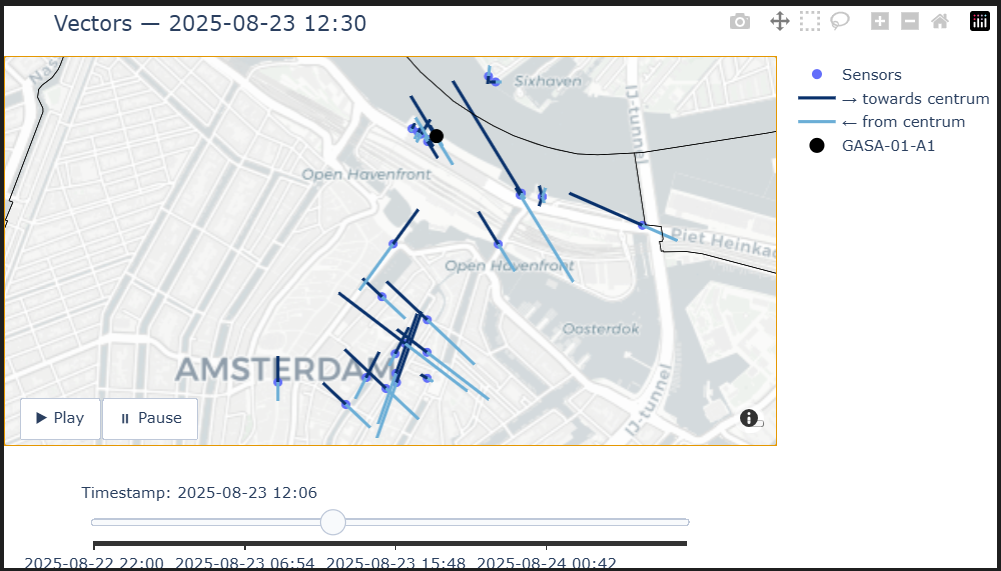

The black lines indicate the city districts, and the colored vectors represent the predicted values. Each sensor measures relative to two angles to determine the flow from both directions. The vector is colored dark blue when it points towards Amsterdam Central statio, close to Amsterdam IJ (GASA-01-A1), and light blue when it points in the opposite direction. GeoJSON in combination with Plotly is used to produce a map of Amsterdam with interactive functions such as zooming in and out, and a play/pause frame player. The frame player is used to represent the monitoring function, and can be used during the event to monitor crows movement. A disadvantage of this, is that no scale of the vectors can be added to quickly identify a certain value in a timeframe, because of the zooming in and out function. Nevertheless can the value be obtained by use of the computer mouse.  

The frame player only represents the flow per sensor. However, to ensure efficient crowd management, the results from the frame player must still be used to predict crowd dynamics across the entire city. In other words, the flows measured at the sensors should be interpreted to identify potential bottlenecks throughout the city. This analysis falls outside the scope of this project; therefore, it is assumed that the operator monitoring the system can use the displayed data to recognize overall flow patterns and detect possible bottlenecks.

## 6.3 Dashboard for monitoring

The team decided to produce a dashboard to monitor the crowd data in real time. It consists of having a tab of an adjustable graph to monitor the amount of people at each sensor and a tab of the vector map showing how many people will move where and in which direction.

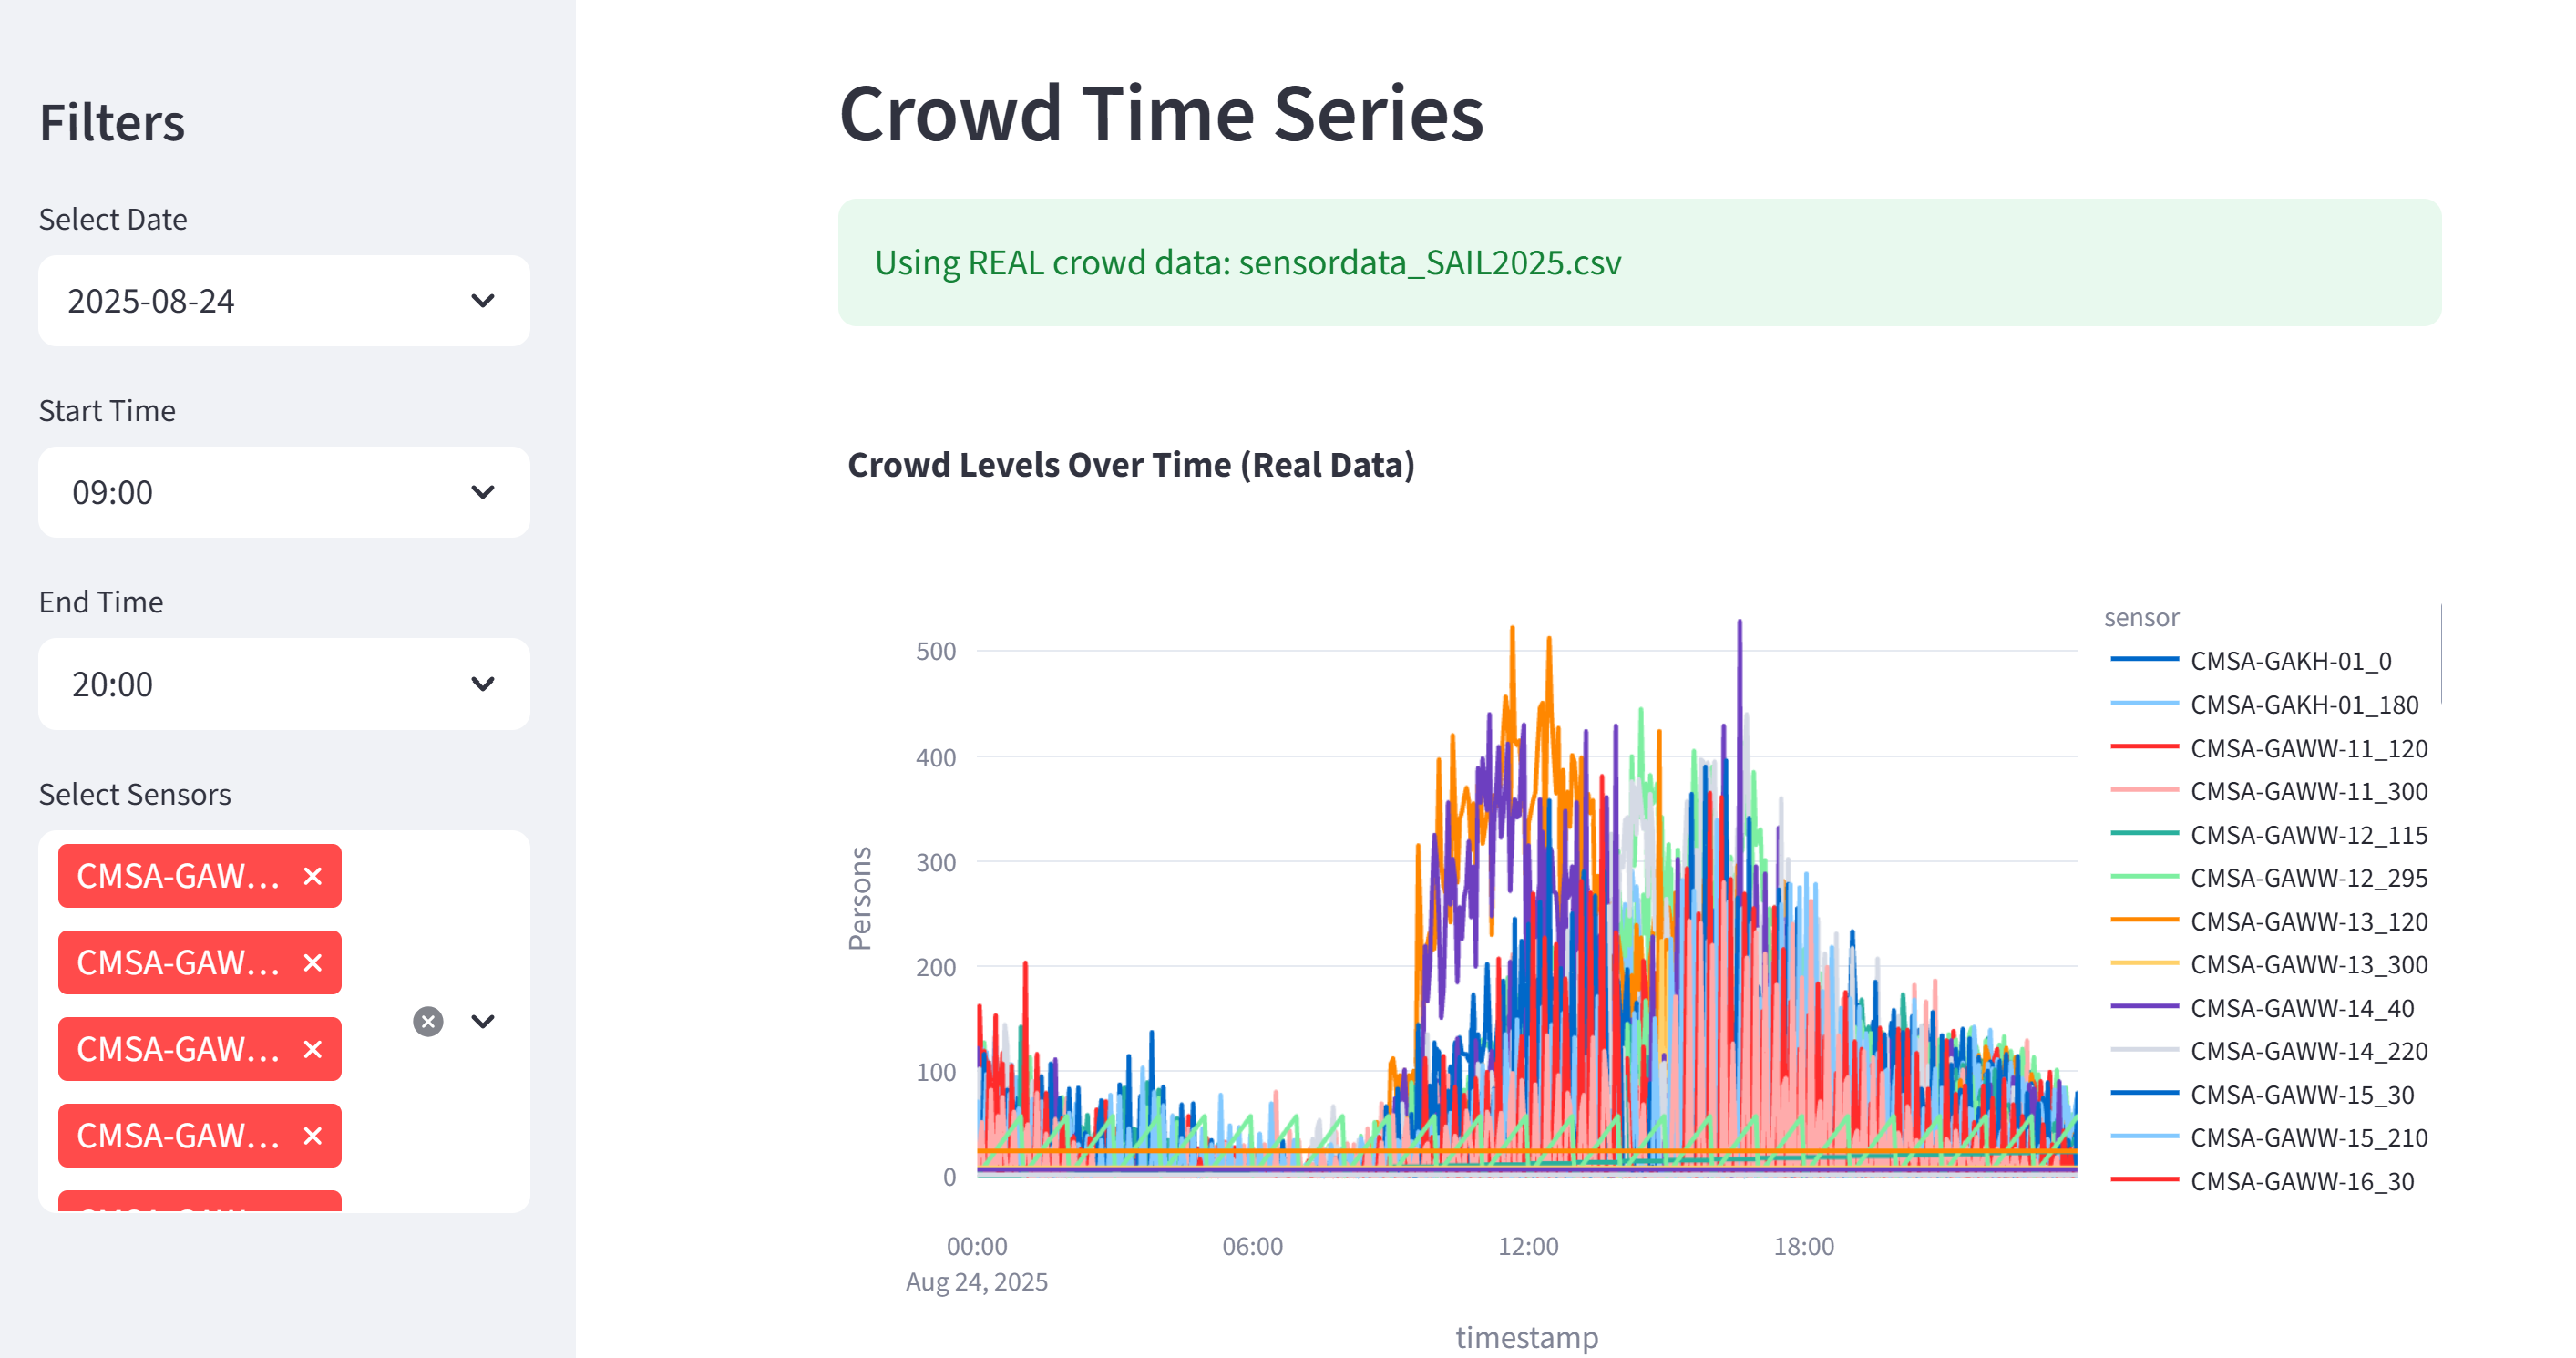
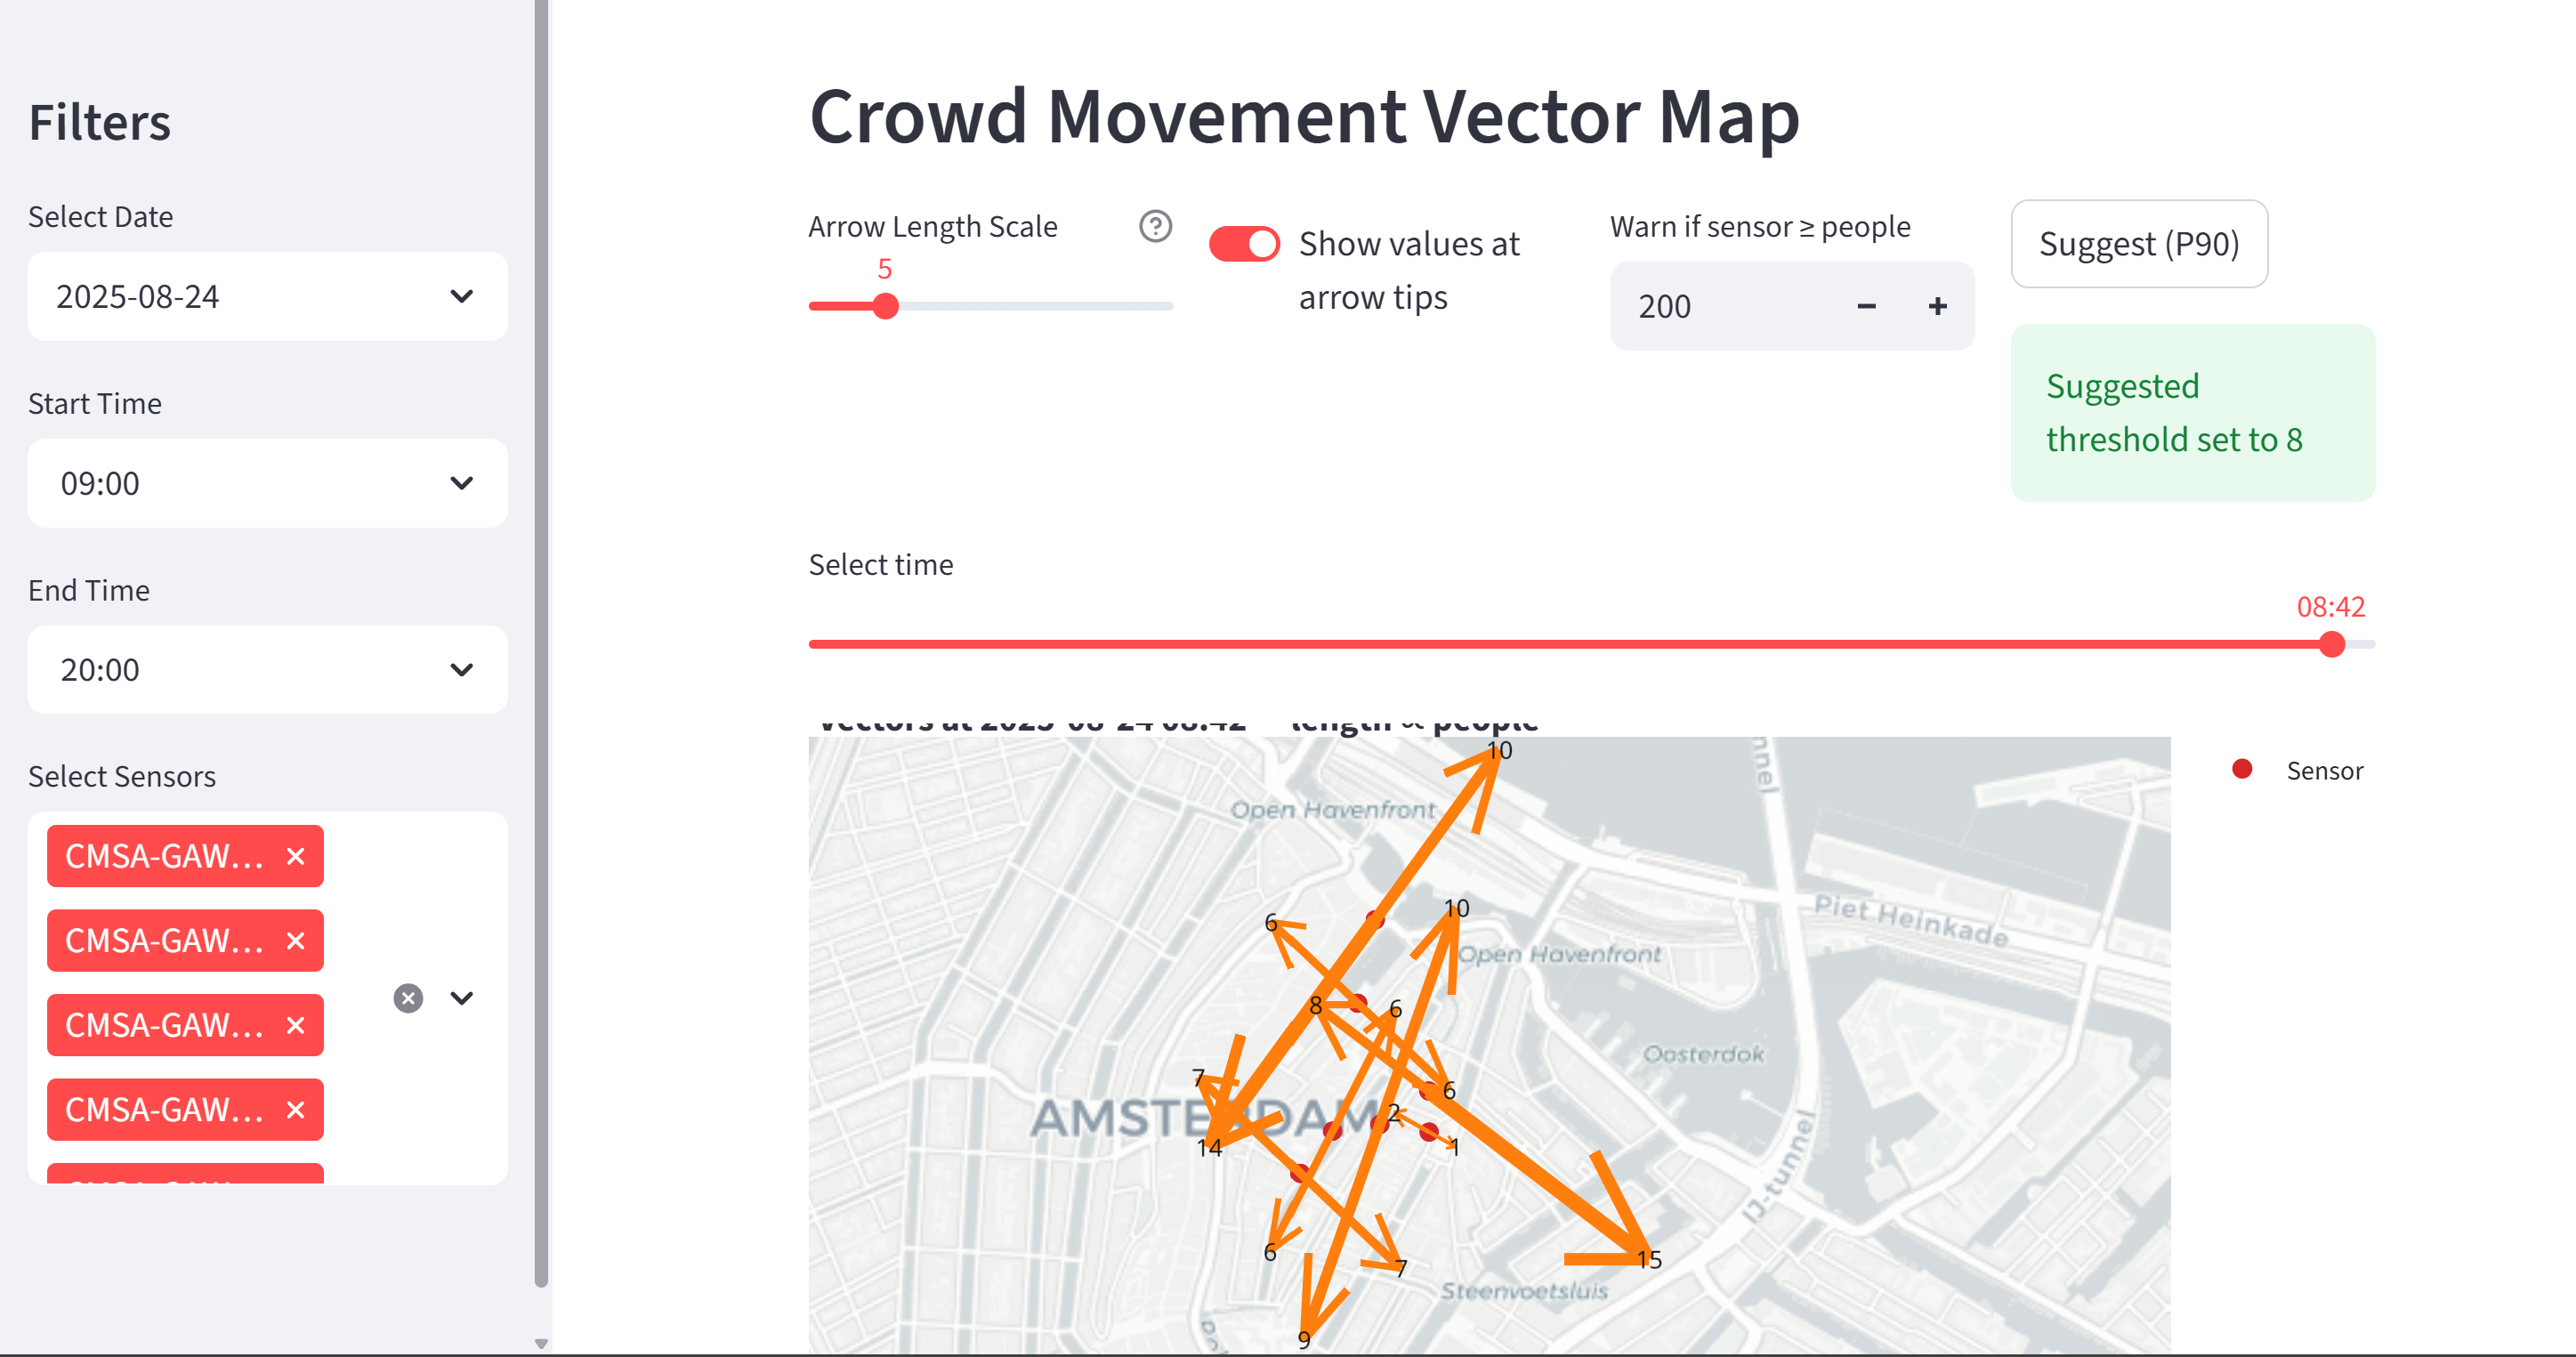
The SAIL Crowd Monitor Dashboard is an interactive web application developed in Streamlit to provide visualizations of real-time and forecast data regarding pedestrian movements captured through several sensors placed around the SAIL event area in Amsterdam. Users can easily use simple filtering by day, time, and sensor location to understand how crowd intensity and flow patterns develop across a day. Time-series trends are combined with directional vector visualizations in this dashboard for both macro- and microlevel crowd flow analyses.

The "Time Series" tab portrays, for each selected sensor, how crowd density has varied over time. It enables the comparison of real and predicted data, shows peak activity hours, and locates specific areas where shifts in pedestrian flow are most evident. The "Vector Map" tab visualizes the directions of sensor-based movement on a living map; arrow lengths indicate crowd intensity, while arrowheads indicate flow direction. Dynamic threshold warnings show places that have surpassed the number of people that can be safely contained, thereby helping event organizers to anticipate and take appropriate action on flow congestion points.


# 7. Conclusion 

The main research question of this project was:
**"To what extent can real-time and contextual data be used to accurately predict short-term (15 minute) crowd behaviour patterns during SAIL 2025?"**

The results of this project show that real-time and contextual data can be used effectively to predict short-term crowd behaviour. The accuracy, however, depends on the complexity of the model and the variation in the data.

First, the Ridge Regression model introduced and was used as a simple linear baseline. It showed that basic relationships between time of day, vessel activity, and weather already explain general patterns in crowd flow.
Still, because of its linear structure, the model was not able to capture sudden or non-linear changes, especially during busy visitor moments.
To improve the performance, the XGBoost model was trained as a second approach.
The XGBoost model could detect more complex relationships between the same features thanks to gradient boosting.
It reached Root Mean Square Error (RMSE) values between 0.5 and 0.8, which means it was more stable and more accurate than the Ridge model (RIDGE RMSE).
These results show that machine learning models using real-time and contextual data can predict crowd flows with good accuracy and answer the main research question positively.

The final system produces new forecasts every three minutes with a prediction horizon of fifteen minutes. To visualize these predictions, flow direction map and a dashboard monitor are used. Furthermore, the dashboard turns the model output into useful information for crowd management, showing the expected direction and intensity of people movement across the area. Although it is a useful tool, it only shows the predicted situation and not the interpretation of risks or bottlenecks. Therefore, the dashboard should be used by experts who can analyse the results themselves and make the right decisions during the event.

The sub-research questions can also be now answered. 

**How can crowd surges be predicted in real time?**

The study shows, that crowd surges can be predicted by combining live sensor data with contextual information such as vessel movements and weather conditions. The models are updated every three minutes, producing new forecasts fifteen minutes ahead, which enables near real-time monitoring of crowd flow.

**What methods can be used to quantify uncertainty in short-term predictions?**

The model performance was evaluated using Root Mean Square Error (RMSE) as a measure of prediction accuracy. Although uncertainty was not explicitly modelled, the comparison between Ridge and XGBoost shows how more advanced, non-linear methods reduce uncertainty in predictions.

**Which input features contribute most to prediction accuracy?**

Time of day, vessel activity near the sensors, and weather conditions were identified as the most influential input features. These contextual variables significantly improved model accuracy compared to using sensor data alone.

**How can these predictions be effectively visualised for use in crowd management dashboards?**

The predicted flows are visualised using an interactive flow direction map and integrated dashboard. These visualisations present movement direction, density, and temporal changes, allowing operators to understand crowd behaviour intuitively.

**How can AI be used to monitor crowd movements, predict bottlenecks and risks, and provide decision support?**

Artificial Intelligence, particularly the XGBoost model, can monitor and forecast crowd movements by analysing contextual and real-time data. However, the system does not yet detect bottlenecks automatically; expert interpretation remains necessary. The dashboard therefore functions as a decision-support tool rather than a fully automated monitoring system.

In summary, this study proves that combining sensor data with contextual factors such as vessel traffic and weather allows rather accurate short-term crowd forecasting. 
This approach can thereby help improve safety, efficiency, and preparation during large public events such as SAIL 2025, while also demonstrating how data-driven methods can support human decision-making in real-time crowd management.


# 8. Limitations and further research

Although the results of this study are promising, there are still some limitations to this research.

First, the dataset used in this project includes only a small number of sensors and a short period of time. This limits how well the models can capture more complex or long-term patterns. To tackle this limitation, future work should include more sensors and longer time periods to make the predictions more robust.

Secondly, the system currently runs on pre-recorded data and not on live data streams.
Even though the setup supports near real-time updating, this function has not yet been implemented. Future development should focus on connecting live sensor, vessel, and weather data so that the model can update continuously during the event.

Thirdly, the system makes new predictions every three minutes for the next fifteen minutes.
While this gives frequent updates, the dashboard itself only shows the predicted crowd flow and does not identify risk areas or bottlenecks. Experts still need to interpret this information to make decisions for crowd management as mentioned in the conclusion. Future versions could therefore add automatic alerts or warnings when high crowd density is predicted.

Fourthly, the flow direction map only shows predictions for the sensor locations.
This means there are a lot of uncovered areas without sensors. Further studies could include spatial interpolation or simulation techniques to estimate crowd movements in those areas.

Lastly, a rather important aspect to keep in mind when using real-time data for monitoring is privacy and data protection. These factors are essential to ensure that all information is handled responsibly. Future applications should make sure that all data remain anonymised and in line with data protection regulations. 


# 9. Literature